In [117]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
carreer_vectors = pd.read_csv('../preprocessed_data/vector_carreers.csv',index_col=0)
carreer_vectors

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
id,,,,,,,,,,,,,,,,,,,,,
1.0,-0.051190,-0.073438,-0.116169,-0.038956,-0.019592,-0.150436,0.003801,0.095652,0.101463,-0.011845,...,0.217835,0.082153,-0.225541,-0.085098,-0.057659,-0.034311,0.131255,-0.268103,-0.017113,-0.014370
2.0,-0.041639,-0.017785,-0.219942,-0.064945,0.031882,-0.145846,0.048879,0.096261,0.081746,0.008143,...,0.161657,0.131664,-0.255074,-0.089732,-0.104535,-0.050058,0.137101,-0.294747,0.012939,-0.053835
3.0,-0.058864,-0.037113,-0.162635,-0.075243,-0.014134,-0.128645,0.058329,0.088352,0.139401,0.016283,...,0.174358,0.083726,-0.245114,-0.065250,-0.060799,-0.067061,0.100321,-0.289230,0.008616,-0.073714
4.0,-0.003176,-0.110779,-0.075107,-0.030054,0.072728,-0.178885,0.106155,0.118688,0.054737,0.063783,...,0.258879,0.106471,-0.188134,-0.021674,-0.021002,-0.078736,0.061677,-0.408307,0.112698,-0.097029
5.0,-0.037027,-0.146005,-0.121824,-0.058764,-0.001044,-0.177751,0.034303,0.109955,0.093681,-0.067704,...,0.182910,0.087741,-0.240925,-0.053024,-0.049341,-0.054615,0.064762,-0.284005,0.045921,-0.055298
6.0,-0.023309,-0.141260,-0.084200,-0.073492,-0.000504,-0.163615,0.044650,0.093650,0.124984,-0.016909,...,0.227857,0.091199,-0.237796,-0.120511,-0.092282,-0.051244,0.104193,-0.258893,0.061387,-0.056608
7.0,-0.053741,-0.072798,-0.146933,-0.025495,0.008610,-0.162395,0.010208,0.074696,0.115650,-0.049344,...,0.196361,0.051225,-0.195496,-0.010500,-0.059137,0.040407,0.028097,-0.295552,0.046112,-0.086670
8.0,-0.052851,-0.143185,-0.117682,-0.043362,-0.032467,-0.185887,-0.037531,0.126889,0.033613,0.006985,...,0.304328,0.045387,-0.271088,-0.095121,-0.103322,0.004063,0.103494,-0.272672,-0.020044,-0.035214
9.0,-0.043086,-0.016996,-0.165548,-0.082464,0.020340,-0.123315,0.081656,0.163186,0.134947,0.055270,...,0.187211,0.094671,-0.210058,-0.009641,-0.009728,-0.105130,0.007160,-0.375904,0.099520,-0.133711


In [119]:
carreers = pd.read_csv('../preprocessed_data/carreras2.csv')
universities = pd.read_csv('../data/tuni/universidades.tsv', sep='\t')
campus = pd.read_csv('../data/tuni/campuses.tsv', sep='\t')



In [124]:
reducer = PCA(n_components=2)
reducer.fit(carreer_vectors[[str(x) for x in range(300)]])
reduced_vectors = reducer.transform(carreer_vectors[[str(x) for x in range(300)]])

In [125]:
ids = np.array([np.array(carreer_vectors.index,dtype='int32')]).transpose()
reduced_vectors = np.append(reduced_vectors,ids,axis=1)
area_ids = []
for i in range(reduced_vectors.shape[0]):
    area = carreers[carreers['ID'] == reduced_vectors[i,2]]['area_id']
    area = area[area.index[0]]
    area_ids.append(area)
reduced_vectors = np.append(reduced_vectors,np.array([area_ids]).transpose(),axis=1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [126]:
categories = np.unique(reduced_vectors[:,2])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))
colored = np.array(list(map(lambda x: colordict[x], reduced_vectors[:,2])))

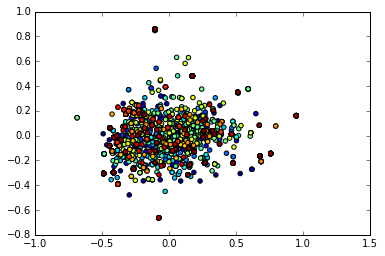

In [123]:
plt.scatter(reduced_vectors[:,0],reduced_vectors[:,1],c=colored)
